#  Импорт библиотек и начальная настройка

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd as np_svd
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MI
from sklearn.metrics import *
from IPython.display import display
from math import sqrt
from itertools import cycle
from pprint import pprint

In [2]:
RANDOM_STATE=345234 # начальное состояние генератора сл. чисел
# установка параметров отображения таблиц pandas
pd.set_option('display.max_rows', 10) 
pd.set_option('display.max_columns', 28)

# Загрузка данных

In [3]:
# загрузить данные из csv файла
data_table = pd.read_csv("cars.csv", index_col=0)
cars = data_table.copy()
# проверить размерность данных
data_table.shape

(93, 27)

Описание признаков (для удобства)

In [4]:
descr = pd.read_csv("format.csv", index_col=0, sep=";")
descr["has_nulls"] = data_table.isnull().any()
pd.set_option('display.max_rows', 28)
pd.set_option('display.max_colwidth', 100)
display(descr)
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_colwidth', 50)

,type,description,has_nulls
feature,,,
Manufacturer,categorical,Manufacturer.,False
Model,categorical,Model.,False
Type,categorical,"Type: a factor with levels ""Small"", ""Sporty"", ""Compact"", ""Midsize"", ""Large"" and ""Van"".",False
Min.Price,numerical,"Minimum Price (in \$1,000): price for a basic version.",False
Price,numerical,"Midrange Price (in \$1,000): average of Min.Price and Max.Price.",False
Max.Price,numerical,"Maximum Price (in \$1,000): price for “a premium version”.",False
MPG.city,numerical,City MPG (miles per US gallon by EPA rating).,True
MPG.highway,numerical,Highway MPG.,False
AirBags,categorical,"Air Bags standard. Factor: none, driver only, or driver & passenger.",True


Загруженная таблица данных

In [5]:
data_table

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25.0,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18.0,25,NaN,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20.0,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19.0,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25,NaN,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
92,Volvo,240,Compact,21.8,22.7,23.5,21.0,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
93,Volvo,850,Midsize,24.8,26.7,28.5,20.0,28,Driver & Passenger,Front,5,2.4,168,6200,2310,Yes,19.3,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


# Изучение данных

Описание числовых признаков

In [6]:
data_table.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,87.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.333333,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.474394,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


Некоторые числовые признаки не заполнены для определённых моделей автомобилей. Порядок минимальных и максимальных значений по признакам соответствует порядку медианного занчения, очевидных выбросов нет.

Описание категориальных признаков

In [7]:
data_table.describe(include=[np.object])

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,93,93,93,87,93,93,93,93,93
unique,32,93,6,3,3,6,2,2,93
top,Ford,SL,Midsize,Driver only,Front,4,Yes,USA,Volkswagen Passat
freq,8,1,22,40,67,49,61,48,1


Все занчения признака Model уникальны, его следует исключить. Аналогично признак Make. Признак AirBags заполнен не везде. Целевой признак DriveTrain имеет 3 уникальных значения, задача многоклассовой классификации. 

Таблицы сопряженности

In [8]:
pd.set_option('display.max_rows', 33)

cat = [x for x in descr.loc[descr.type=="categorical"].index 
       if x not in ["Manufacturer", "Model", "Make"]]
for feature in cat:
    if feature != "DriveTrain":
        display(pd.crosstab(data_table[feature], 
                            data_table.DriveTrain, 
                            dropna=False, margins=True))
        
pd.set_option('display.max_rows', 8)

DriveTrain,4WD,Front,Rear,All
Type,,,,
Compact,1,13,2,16
Large,0,7,4,11
Midsize,0,17,5,22
Small,2,19,0,21
Sporty,2,7,5,14
Van,5,4,0,9
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
AirBags,,,,
Driver & Passenger,0,10,5,15
Driver only,5,25,10,40
None,5,26,1,32
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Cylinders,,,,
3,1,2,0,3
4,4,41,4,49
5,0,2,0,2
6,5,20,6,31
8,0,2,5,7
rotary,0,0,1,1
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Man.trans.avail,,,,
No,3,22,7,32
Yes,7,45,9,61
All,10,67,16,93


DriveTrain,4WD,Front,Rear,All
Origin,,,,
USA,5,34,9,48
non-USA,5,33,7,45
All,10,67,16,93


Классы не сбалансированы, переднеприводных автомобилей в выборке значительно больше остальных. Признак Origin разделяет объекты по классам практически равномерно, вероятно, его следует исключить. Имеется один роторный автомобиль, его лучше исключить. Признак AirBags не заполнен для 6 переднеприводных авотмобилей.

In [9]:
cars = cars.drop(cars[cars.Cylinders=="rotary"].index)

# Отбор признаков

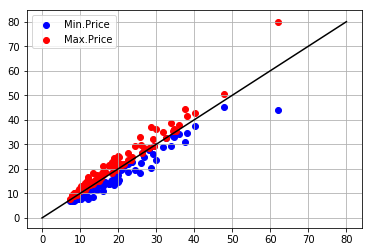

In [10]:
plt.scatter(data_table.Price, data_table["Min.Price"], color='b', label="Min.Price")
plt.scatter(data_table.Price, data_table["Max.Price"], color='r', label="Max.Price")
plt.plot([0,80],[0,80], color='k') ;plt.legend(); plt.grid()
plt.show()

Признаки Min.Price и Max.Price могут быть выражены через Price, они избыточны.

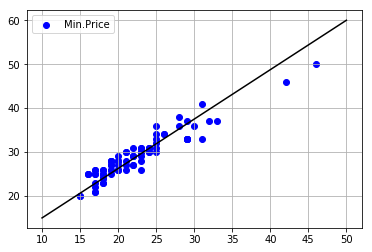

In [11]:
plt.scatter(data_table["MPG.city"], data_table["MPG.highway"], color='b', label="Min.Price")
plt.plot([10,50],[15,60], color='k') ;plt.legend(); plt.grid()
plt.show()

Признаки MPG.city и MPG.highway также зависят практически линейно, достаточно оставить один из них. 

Кодировка занчения целевого признака <br>
Front - 0<br>
Rear  - 1<br>
4WD   - 2<br>

In [12]:
def encode(drive_train):
    if drive_train == "Front": return 0
    if drive_train == "Rear": return 1
    if drive_train == "4WD": return 2
    raise Error("Unknown drive_train: {}".format(drive_train))

def decode(code):
    if code == 0: return "Front"
    if code == 1: return "Rear"
    if code == 2: return "4WD"
    raise Error("Unknown code: {}".format(code))
    
target = cars.DriveTrain.copy()
target[target=="Front"]=encode("Front")
target[target=="Rear"]=encode("Rear")
target[target=="4WD"]=encode("4WD")
target = target.astype('int')

Отсечение признаков по порогу взаимной информации

In [13]:
# числовые признаки
num_features = descr[descr.type=="numerical"].index
# признаки с отсутствующими занчениями
null_features = descr[descr.has_nulls].index
print("null_features={}".format(list(null_features)))
# числовые признаки без отсутствующих занчений
features = cars[[x for x in num_features if x not in null_features]] # numerical without nulls
mi = MI(features, cars.DriveTrain, random_state=RANDOM_STATE)
mi_threshold = 0.085

remove_features = set(null_features)
for i,f in enumerate(features.columns):
    print("{} mi({:>18s})={:4.3f}".format("   " if mi[i]>0.085 else "[X]", f,mi[i]))
    if mi[i] < mi_threshold:
        remove_features.add(f)

# удалить дополнительно признаки:
remove_features.update({"DriveTrain"}) # целевой
remove_features.update({"Max.Price", "Min.Price", "MPG.city"}) # зависимые
remove_features.update({"Model", "Make", "Origin"}) # бесполезные
# remove_features.update({"Man.trans.avail","Cylinders", "Type"})
print("removed features:")
pprint(remove_features)
cars = cars[[x for x in cars.columns if x not in remove_features]]

null_features=['MPG.city', 'AirBags', 'Rear.seat.room', 'Luggage.room']
[X] mi(         Min.Price)=0.085
[X] mi(             Price)=0.074
[X] mi(         Max.Price)=0.036
    mi(       MPG.highway)=0.147
    mi(        EngineSize)=0.119
[X] mi(        Horsepower)=0.078
    mi(               RPM)=0.152
[X] mi(      Rev.per.mile)=0.060
    mi(Fuel.tank.capacity)=0.186
    mi(        Passengers)=0.105
    mi(            Length)=0.112
[X] mi(         Wheelbase)=0.057
    mi(             Width)=0.134
[X] mi(       Turn.circle)=0.026
    mi(            Weight)=0.123
removed features:
{'AirBags',
 'DriveTrain',
 'Horsepower',
 'Luggage.room',
 'MPG.city',
 'Make',
 'Max.Price',
 'Min.Price',
 'Model',
 'Origin',
 'Price',
 'Rear.seat.room',
 'Rev.per.mile',
 'Turn.circle',
 'Wheelbase'}


Оставшиеся признаки:

In [14]:
pd.set_option('display.max_rows', 28); pd.set_option('display.max_colwidth', 80)
new_descr = descr.loc[descr.index.isin(cars.columns)]
display(new_descr)
pd.set_option('display.max_rows', 10); pd.set_option('display.max_colwidth', 50)

,type,description,has_nulls
feature,,,
Manufacturer,categorical,Manufacturer.,False
Type,categorical,"Type: a factor with levels ""Small"", ""Sporty"", ""Compact"", ""Midsize"", ""Large"" ...",False
MPG.highway,numerical,Highway MPG.,False
Cylinders,categorical,"Number of cylinders (missing for Mazda RX-7, which has a rotary engine).",False
EngineSize,numerical,Engine size (litres).,False
RPM,numerical,RPM (revs per minute at maximum horsepower).,False
Man.trans.avail,categorical,"Is a manual transmission version available? (yes or no, Factor).",False
Fuel.tank.capacity,numerical,Fuel tank capacity (US gallons).,False
Passengers,numerical,Passenger capacity (persons),False


# Нормализация

Кодировка признаков 0/1 (one hot)

In [15]:
ncars = cars.copy()
categorical = new_descr[new_descr.type=="categorical"].index
binary_features = dict()
for feature in categorical:
    u_values = ncars[feature].unique()
    for uv in u_values:
        binary_features["{}_{}".format(feature,uv)] = len(u_values)
        ncars["{}_{}".format(feature,uv)] = ncars[feature]== uv
ncars = ncars[[x for x in ncars.columns if x not in categorical]]
ncars

,MPG.highway,EngineSize,RPM,Fuel.tank.capacity,Passengers,Length,Width,Weight,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,...,Manufacturer_Volvo,Type_Small,Type_Midsize,Type_Compact,Type_Large,Type_Sporty,Type_Van,Cylinders_4,Cylinders_6,Cylinders_8,Cylinders_3,Cylinders_5,Man.trans.avail_Yes,Man.trans.avail_No
1,31,1.8,6300,13.2,5,177,68,2705,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2,25,3.2,5500,18.0,5,195,71,3560,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,True,False
3,26,2.8,5500,16.9,5,180,67,3375,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,26,2.8,5500,21.1,6,193,70,3405,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,True,False
5,30,3.5,5700,21.1,4,186,69,3640,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,21,2.5,4500,21.1,7,187,72,3960,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,True,False
90,30,2.0,5800,18.5,5,180,67,2985,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,True,False
91,25,2.8,5800,18.5,4,159,66,2810,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False,False,False,True,False
92,28,2.3,5400,15.8,5,190,67,2985,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False,False,False,True,False


<strike>Преобразование начала отчёта и масштаба</strike>
<br>Будут использоваться деревья решений, это не понадобится

In [16]:
do_norm = False # нормализация не нужна
if do_norm:
    ncars = (ncars-ncars.mean())/(ncars.max()-ncars.min())
    for feature, n in binary_features.items():
        ncars[feature] = ncars[feature]/sqrt(n)
    display(ncars)

# Train/test split

In [17]:
from sklearn.model_selection import train_test_split
ncars_train, ncars_test, y_train, y_test = train_test_split(ncars, target, test_size=0.33, stratify=target, 
                                                            random_state=RANDOM_STATE)


# Классификатор на деревьях решений

In [18]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

Обучение на тренировочной выборке

In [19]:
classifier.fit(ncars_train, y=y_train);

Оценка точности на тестовых данных

In [20]:
y_pred = classifier.predict(ncars_test)
print("test accuracy = {:4.2f} %".format(accuracy_score(y_test, y_pred)*100))
labels = range(0,3)
index = [decode(x) for x in labels]
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels), 
                        index=[x+" actual" for x in index], 
                        columns=[x+" pred" for x in index])
display(c_matrix)

test accuracy = 83.87 %


,Front pred,Rear pred,4WD pred
Front actual,21,1,1
Rear actual,1,3,1
4WD actual,1,0,2


Визуализация дерева

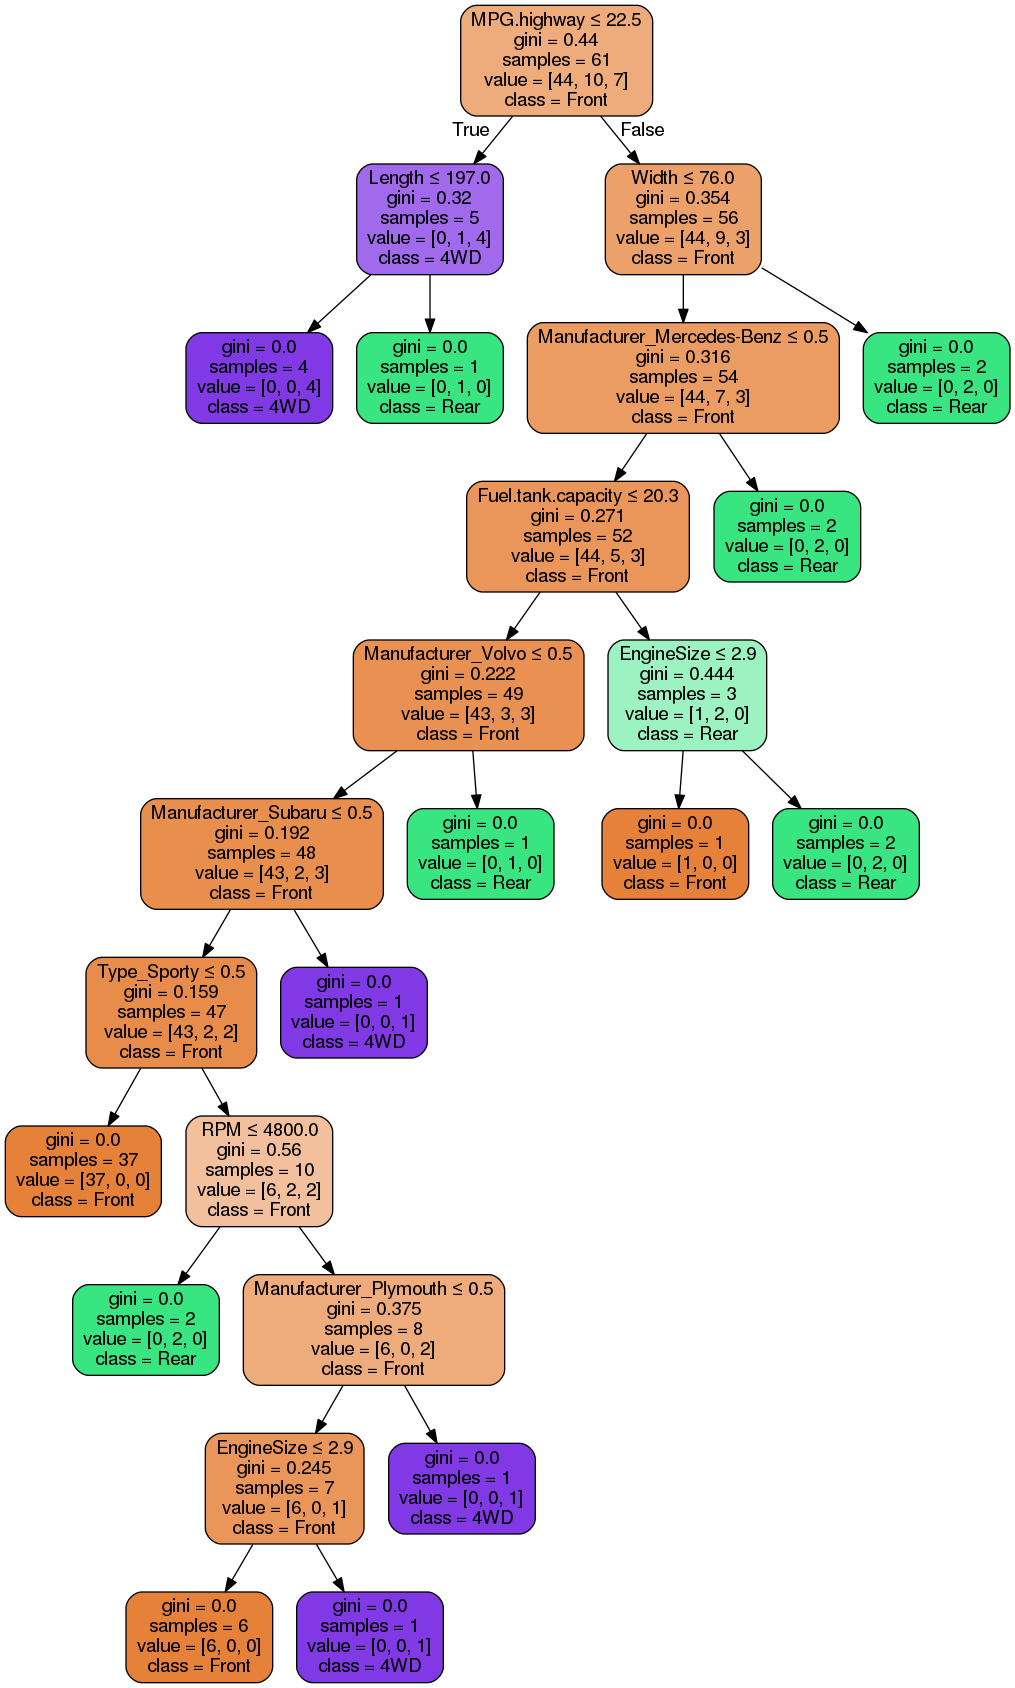

In [21]:
import graphviz
from IPython.core.display import Image, display
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=ncars.columns,  
                         class_names=[decode(x) for x in range(0,3)],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data, format="png")
graph.render(filename="tree")
display(Image('tree.png'))

# Оценка качества

С помощью кросс-валидации

In [22]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(classifier, X=ncars, y=target, cv=10, scoring=make_scorer(accuracy_score))
cv_accuracy_m = cv_accuracy.mean()
print(cv_accuracy)
print("mean accuracy = {:4.2f} %".format(cv_accuracy_m*100))

[ 0.8         0.9         0.8         0.7         0.8         0.88888889
  1.          0.875       1.          0.75      ]
mean accuracy = 85.14 %
